In [4]:
import pandas as pd

Stock_market = pd.read_csv('economi.csv', names= ['Year','Month','Interest_Rate','Unemployement_Rate','Stock_Index_Price'])
df= pd.DataFrame(Stock_market)
df.head()

Year  Month  Interest_Rate  Unemployement_Rate  Stock_Index_Price
0  2017     12           2.75                 5.3               1464
1  2017     11           2.50                 5.3               1394
2  2017     10           2.50                 5.3               1357
3  2017      9           2.50                 5.3               1293
4  2017      8           2.50                 5.4               1256

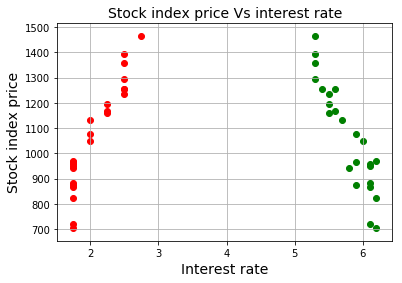

In [5]:
from pandas import DataFrame
import matplotlib.pyplot as plt
plt.scatter(df['Interest_Rate'],df['Stock_Index_Price'], color= 'red')
plt.scatter(df['Unemployement_Rate'], df['Stock_Index_Price'], color='green')
plt.title('Stock index price Vs interest rate', fontsize= 14)
plt.xlabel('Interest rate', fontsize= 14)
plt.ylabel('Stock index price', fontsize= 14)
plt.grid(True)
plt.show()

In [6]:
from pandas import DataFrame 
from sklearn import linear_model
import statsmodels.api as sm



X = df[['Interest_Rate','Unemployement_Rate']]
Y = df['Stock_Index_Price']
regr = linear_model.LinearRegression()
regr.fit(X, Y)
print("Intercept: \n", regr.intercept_)
print("Coefficients: \n", regr.coef_)
#prediction with sklearn
New_Interest_Rate = 7.5
New_Unemployement_Rate = 6.5
print('Predicted Stock index price: \n', regr.predict([[New_Interest_Rate , New_Unemployement_Rate]]))


#with statsmodel
X = sm.add_constant(X) 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X)

print_model = model.summary()
print(print_model)

Intercept: 
 1798.4039776258546
Coefficients: 
 [ 345.54008701 -250.14657137]
Predicted Stock index price: 
 [2764.0019163]
                            OLS Regression Results                            
Dep. Variable:      Stock_Index_Price   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     92.07
Date:                Sat, 09 Nov 2019   Prob (F-statistic):           4.04e-11
Time:                        09:57:26   Log-Likelihood:                -134.61
No. Observations:                  24   AIC:                             275.2
Df Residuals:                      21   BIC:                             278.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]

In [7]:
#for client use we add a GUI model

from pandas import DataFrame
from sklearn import linear_model
import tkinter as tk
import statsmodels.api as sm


root = tk.Tk()

canvas1 = tk.Canvas(root, width= 1200, height = 450)
canvas1.pack()

#with sklearn
Intercept_result = ('Intercept:', regr.intercept_)
label_Intercept = tk.Label(root, text=Intercept_result, justify = 'center')
canvas1.create_window(260, 220, window = label_Intercept)

#with sklearn
Coefficients_result =('Coefficients:', regr.coef_)
label_Coefficients = tk.Label(root, text=Coefficients_result, justify ='center')
canvas1.create_window(260,240, window = label_Coefficients)

#with statsmodel
print_model = model.summary()
label_model = tk.Label(root, text= print_model, justify ='center', relief = 'solid', bg = 'LightSkyBlue')
canvas1.create_window(880, 220, window = label_model)

label1 =tk.Label(root, text='Interest Rate:')
canvas1.create_window(100,100, window =label1)

entry1 = tk.Entry(root)
canvas1.create_window(270, 100, window= entry1)

label2 =tk.Label(root, text='Unemployement Rate:')
canvas1.create_window(120,120, window =label2)

entry2 = tk.Entry(root)
canvas1.create_window(270, 120, window= entry2)

def values():
    global New_Interest_Rate
    New_Interest_Rate = float(entry1.get())
    
    global New_Unemployement_Rate
    New_Unemployement_Rate = float(entry2.get())
    
    Prediction_result =('Predicted Stock Index Price:', regr.predict([[New_Interest_Rate , New_Unemployement_Rate]]))
    label_Prediction = tk.Label(root, text= Prediction_result, bg='orange')
    
    canvas1.create_window(260, 280, window= label_Prediction)
    
    
button1= tk.Button(root, text='Predict Stock Index Price:', command= values, bg='orange')
canvas1.create_window(270,150, window=button1)

root.mainloop()

In [8]:
Stock_market = {'Year':[2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016],
                'Month':[],
                'Interest_Rate':[],
                'Unemployement_Rate':[],
                'Stock_Index_Price':[]}